## In this activity, we will use Argovis to explore temperature fields that were created from observations: our goal is to describe the differences between different phases of ENSO

Argovis offers a growing list of gridded products, indexed and downloadable through its API. In this notebook, we'll use the Argovis API to access temperature fields and describe different phases of ENSO.

> **This is a beta product!**
> Argovis' new API is currently undergoing heavy development. Therefore, everything in these notebooks should be understood as a technical preview only; implementation details may change before a 
stable release is made. Please send feedback and ideas to argovis@colorado.edu, and see the API docs as they evolve at https://argovis-api.colorado.edu/docs/.

## Setup

In addition to importing a few python packages, make sure to plug in your Argovis API key for `API_KEY` in the next cell. If you don't have a free Argovis API key yet, get one at https://argovis-keygen.colorado.edu/.

In [1]:
import requests, xarray, pandas, math, datetime, copy
import numpy as np
from datetime import datetime, timedelta
from argovisHelpers import helpers as avh
import matplotlib.pyplot as plt
from scipy import signal

import urllib

from grids_helper import def_activity_param, run_activity_maps, \
                        run_activity_sections, plot_line_pos_neg,\
                        query_grid_by_region_month_year, \
                        create_boxstr_for_query, \
                        areaweighted_region_mean

API_KEY=''
API_PREFIX = 'https://argovisbeta01.colorado.edu/api/'

In [3]:
# %%javascript
# IPython.OutputArea.auto_scroll_threshold = 9999

## Accessing gridded fields in Argovis

Argovis supports a number of grids through the same API endpoints. Let's begin by discovering what grids are available:

In [4]:
grids = avh.query('grids/vocabulary', options={'parameter':'gridName'}, apikey=API_KEY, apiroot=API_PREFIX)
grids

[{'grid_1_1_0.5_0.5': {'grids': ['rg09_temperature',
    'rg09_salinity',
    'kg21_ohc15to300'],
   'lattice': [[-179.5, -64.5],
    [-179.5, -63.5],
    [-179.5, -62.5],
    [-179.5, -61.5],
    [-179.5, -60.5],
    [-179.5, -59.5],
    [-179.5, -58.5],
    [-179.5, -57.5],
    [-179.5, -56.5],
    [-179.5, -55.5],
    [-179.5, -54.5],
    [-179.5, -53.5],
    [-179.5, -52.5],
    [-179.5, -51.5],
    [-179.5, -50.5],
    [-179.5, -49.5],
    [-179.5, -48.5],
    [-179.5, -47.5],
    [-179.5, -46.5],
    [-179.5, -45.5],
    [-179.5, -44.5],
    [-179.5, -43.5],
    [-179.5, -42.5],
    [-179.5, -41.5],
    [-179.5, -40.5],
    [-179.5, -39.5],
    [-179.5, -38.5],
    [-179.5, -37.5],
    [-179.5, -36.5],
    [-179.5, -35.5],
    [-179.5, -34.5],
    [-179.5, -33.5],
    [-179.5, -32.5],
    [-179.5, -31.5],
    [-179.5, -30.5],
    [-179.5, -29.5],
    [-179.5, -28.5],
    [-179.5, -27.5],
    [-179.5, -26.5],
    [-179.5, -25.5],
    [-179.5, -24.5],
    [-179.5, -23.5],
    [-179

In the following, we will use the temperature product by Roemmich and Gilson, 2009, i.e. the `rg09_temperature` grid product found in the `grid_1_1_0.5_0.5` grid. This product was created mapping mesurements from Argo profiles.

# ---> Let's now use gridded temperature fields to look at maps and describe different ENSO phases

## Question #1 (please answer in the context of describing different ENSO phases): Which of the regions in the following would be helpful to look at in a temperature map? Options: 'equatorial_atlantic', 'equatorial_indian', 'equatorial_pacific'

### >>> NOTE: once you have your answer, please edit the next cell (if needed). As an example, if you would like to proceed with the region 'equatorial_atlantic', the line below should look like this: 
`region_selected       = 'equatorial_atlantic'`

In [5]:
# select region
region_selected       = 'equatorial_pacific'

## Question #2 (please answer in the context of describing different ENSO phases): What depth level should we select for the temperature map? Options: 'near_surface', 'near_1500m'

### >>> NOTE: once you have your answer, please edit the next cell (if needed). As an example, if you would like to proceed with the depth level 'near_surface', the line below should look like this: 
`depth_level_selected  = 'near_surface'`

In [6]:
# select depth level
depth_level_selected  = 'near_surface'

#### Given the selection above, we now create the parameters to use in the following for the activity. HINT: As you run the next cell, please look at the messages printed on the screen and check if you selected the correct region and depth level for the map.

In [7]:
# create activity parameters based on selection above
activity = def_activity_param('activity_enso',region_selected=region_selected, \
                              section_selected_lat='',depth_level_selected=depth_level_selected,\
                               API_KEY=API_KEY, API_PREFIX=API_PREFIX)

Good job selecting the region for the map!
Good job selecting the depth level for the map!
Before displaying the section, please select a valid name for the latitude


## Let's first look at the selected temperature map (i.e. for the selected region and depth level) during normal conditions (this is the same as one of the plots we discussed in the lecture)

A red box is indicated in the map: this box will be helpful to answer Question #4 later, when you will compare other years to 2013 (2013 is a year characterized by normal conditions).

[[150.5,-7], [150.5,7], [-119.5,7], [-119.5,-7], [150.5,-7]]
{'startDate': '2013-12-01T00:00:00Z', 'endDate': '2013-12-31T00:00:00Z', 'polygon': '[[150.5,-7], [150.5,7], [-119.5,7], [-119.5,-7], [150.5,-7]]', 'data': 'rg09_temperature', 'presRange': '0,5', 'compression': 'array'}


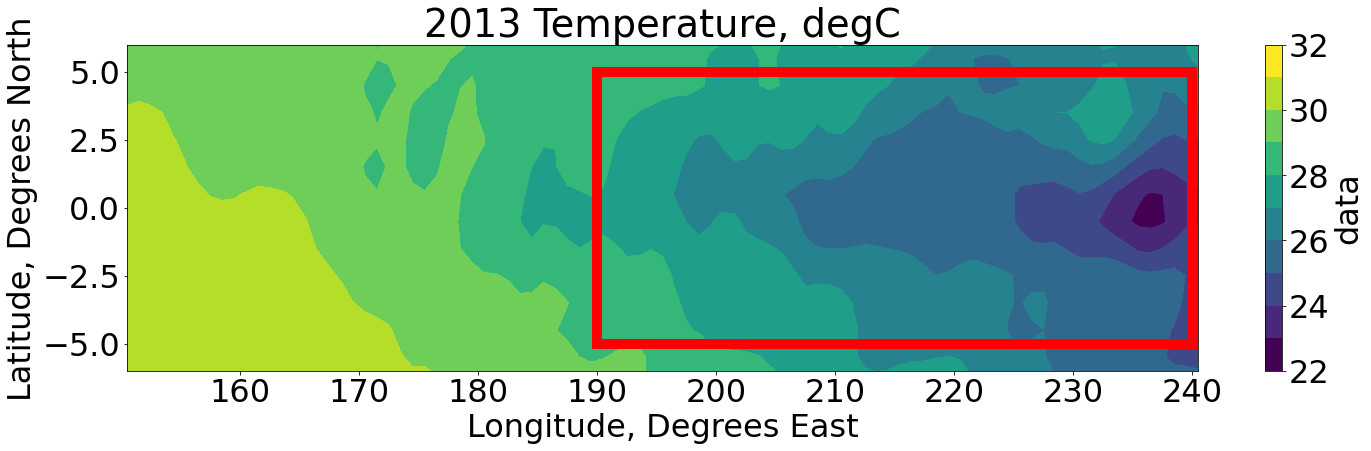

In [8]:
run_activity_maps(activity=activity,str_year='year_neutral_conditions')

## Question #3: Looking at the map above, describe one characteristic we discussed during the lecture for this temperature field. 

# Let's now look at years when wind and current flow are different from normal

[[150.5,-7], [150.5,7], [-119.5,7], [-119.5,-7], [150.5,-7]]
{'startDate': '2007-12-01T00:00:00Z', 'endDate': '2007-12-31T00:00:00Z', 'polygon': '[[150.5,-7], [150.5,7], [-119.5,7], [-119.5,-7], [150.5,-7]]', 'data': 'rg09_temperature', 'presRange': '0,5', 'compression': 'array'}


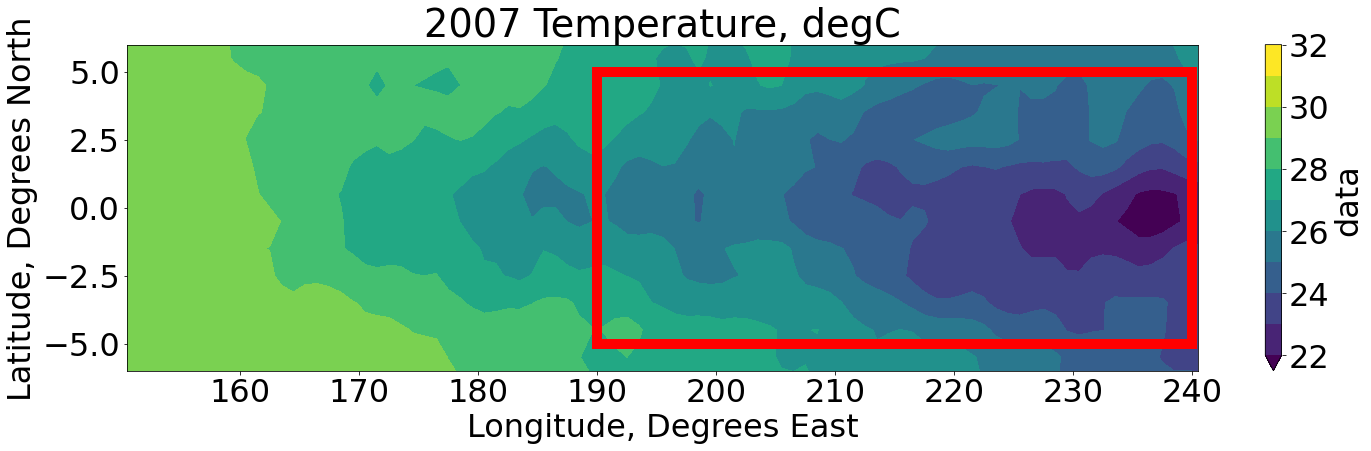

[[150.5,-7], [150.5,7], [-119.5,7], [-119.5,-7], [150.5,-7]]
{'startDate': '2009-12-01T00:00:00Z', 'endDate': '2009-12-31T00:00:00Z', 'polygon': '[[150.5,-7], [150.5,7], [-119.5,7], [-119.5,-7], [150.5,-7]]', 'data': 'rg09_temperature', 'presRange': '0,5', 'compression': 'array'}


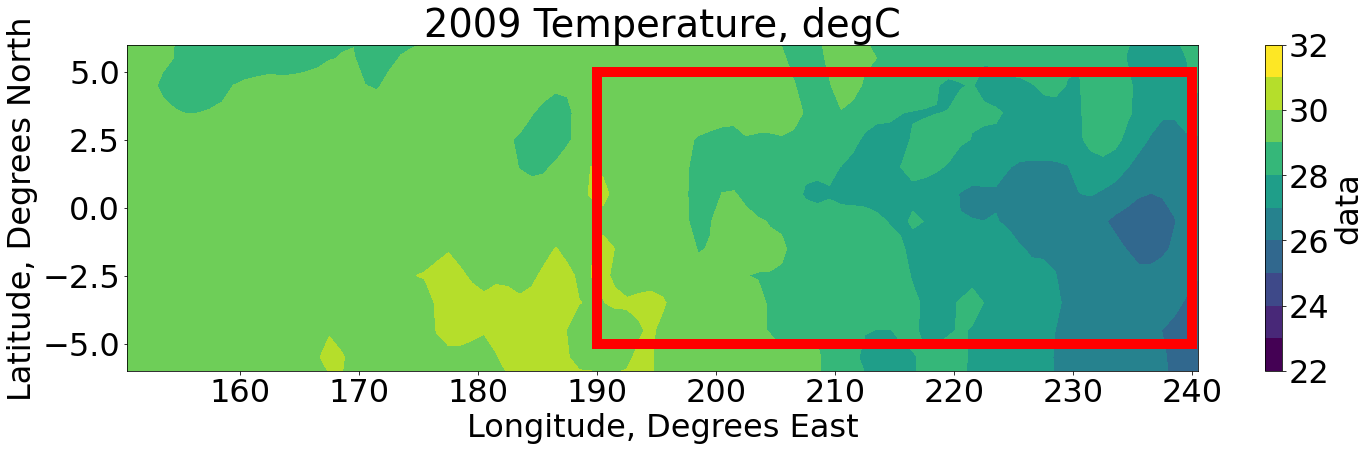

[[150.5,-7], [150.5,7], [-119.5,7], [-119.5,-7], [150.5,-7]]
{'startDate': '2010-12-01T00:00:00Z', 'endDate': '2010-12-31T00:00:00Z', 'polygon': '[[150.5,-7], [150.5,7], [-119.5,7], [-119.5,-7], [150.5,-7]]', 'data': 'rg09_temperature', 'presRange': '0,5', 'compression': 'array'}


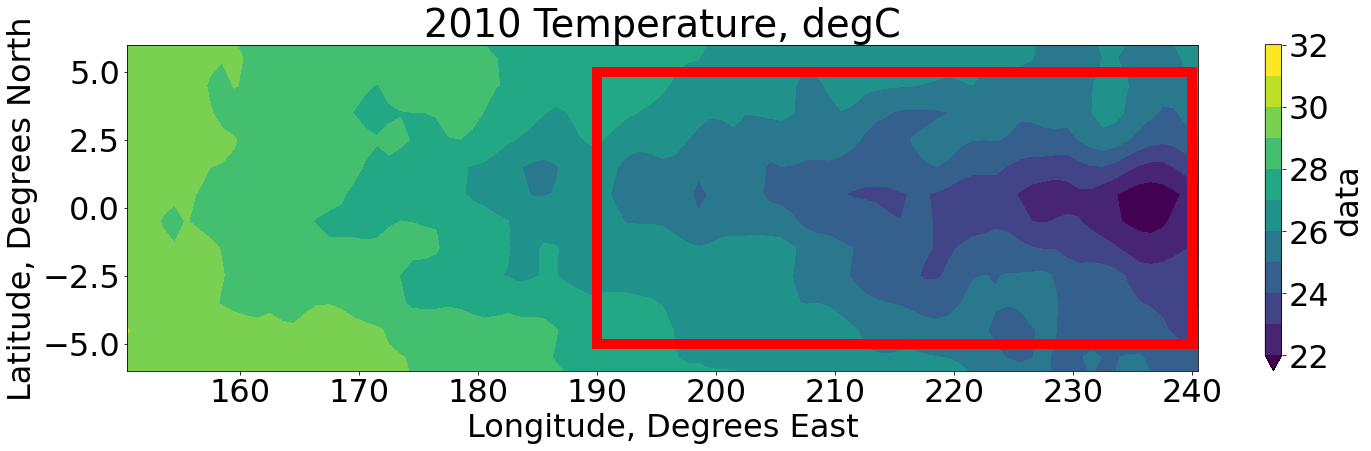

[[150.5,-7], [150.5,7], [-119.5,7], [-119.5,-7], [150.5,-7]]
{'startDate': '2015-12-01T00:00:00Z', 'endDate': '2015-12-31T00:00:00Z', 'polygon': '[[150.5,-7], [150.5,7], [-119.5,7], [-119.5,-7], [150.5,-7]]', 'data': 'rg09_temperature', 'presRange': '0,5', 'compression': 'array'}


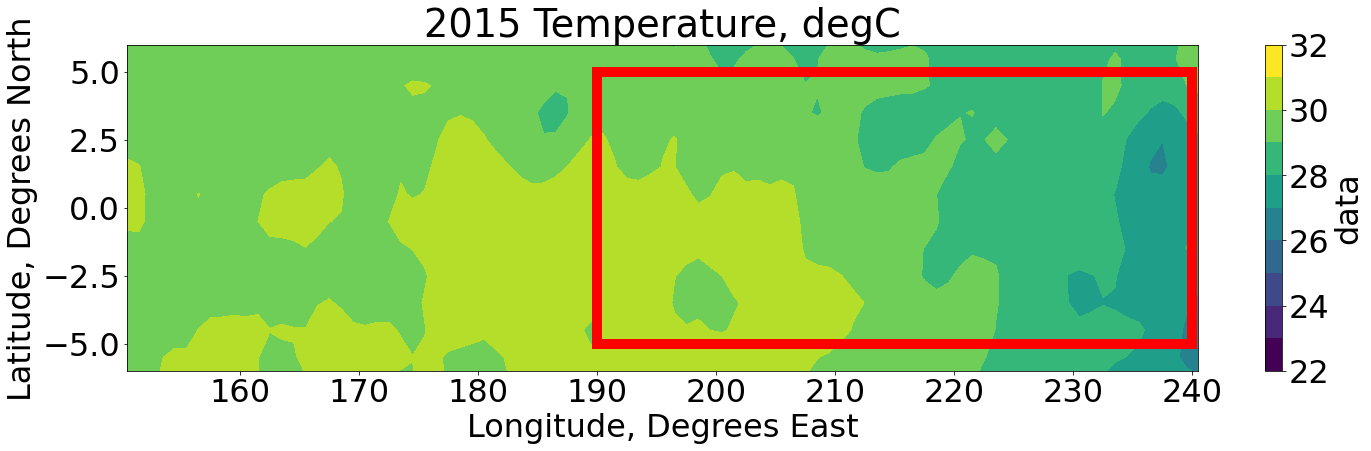

In [9]:
run_activity_maps(activity=activity,str_year='year_enso')

## Question #4: For each of the years in the maps above, how does the average temperature within the red box compare to 2013? Which years do you think may correspond to the same ENSO phase? (i.e. which years would you group together as they look similar to one another and different from 2013?) 

NOTE: the colorbar is the same in each panel, hence each color corresponds to the same temperature in each panel.

#  ---> Let's now use gridded temperature fields to look at zonal  (i.e. along longitude) sections and describe different ENSO phases

## Question #5 (please answer in the context of describing different ENSO phases): What latitude would be helpful to select (and look at) for a zonal section? Options: 'subpolar','midlatitude','equatorial'

### >>> NOTE: once you have your answer, please edit the next cell (if needed). As an example, if you would like to proceed with a 'subpolar' latitude, the line below should look like this: 
`section_selected_lat = 'subpolar'`

In [10]:
# select latitude band
section_selected_lat = 'equatorial'

#### Given the selection above, we now create the parameters to use in the following for the activity. HINT: As you run the next cell, please look at the messages printed on the screen and check if you selected the correct latitude for the section.

In [11]:
# create activity parameters based on selection above
activity = def_activity_param('activity_enso',region_selected=region_selected, \
                              section_selected_lat=section_selected_lat,depth_level_selected=depth_level_selected,\
                               API_KEY=API_KEY, API_PREFIX=API_PREFIX)

Good job selecting the region for the map!
Good job selecting the depth level for the map!
Good job selecting the latitude for the section!


# Let's first look at the selected latitude band during normal conditions (this is the same as one of the plots we discussed during the lecture)

[[150.5,-7], [150.5,7], [-119.5,7], [-119.5,-7], [150.5,-7]]


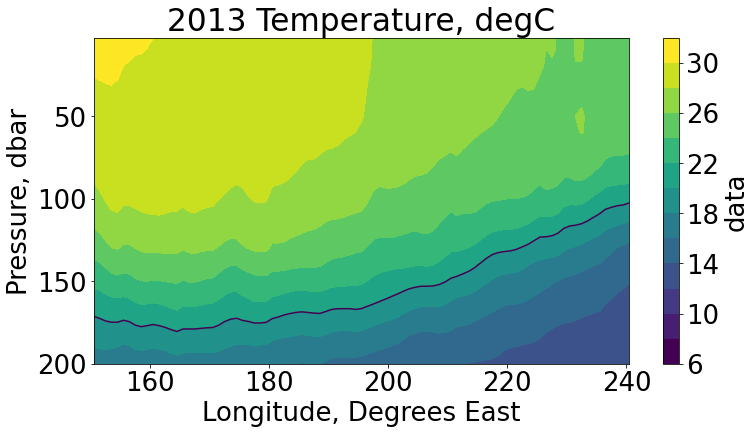

In [11]:
run_activity_sections(activity=activity,str_year='year_neutral_conditions')

## Question #6: Describe one characteristic we discussed (during the lecture) for this temperature field. Hint: describe the tilt of the 20-degree isotherm (black line).

# Let's now look at years when wind and current flow are different from normal

[[150.5,-7], [150.5,7], [-119.5,7], [-119.5,-7], [150.5,-7]]
{'startDate': '2007-12-01T00:00:00Z', 'endDate': '2007-12-31T00:00:00Z', 'polygon': '[[150.5,-7], [150.5,7], [-119.5,7], [-119.5,-7], [150.5,-7]]', 'data': 'rg09_temperature', 'presRange': '0,250', 'compression': 'array'}


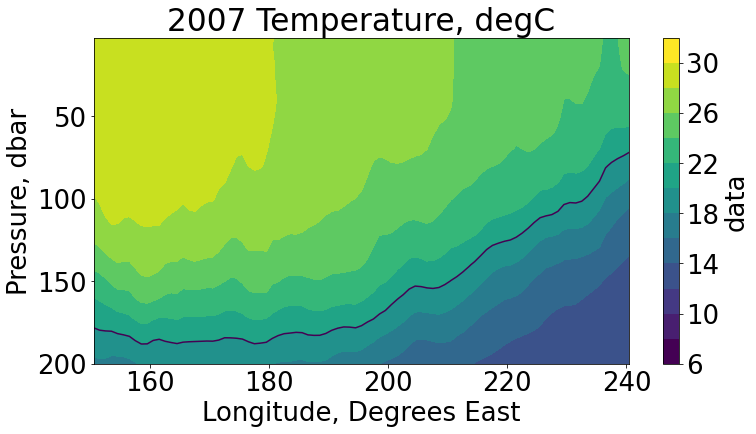

[[150.5,-7], [150.5,7], [-119.5,7], [-119.5,-7], [150.5,-7]]
{'startDate': '2009-12-01T00:00:00Z', 'endDate': '2009-12-31T00:00:00Z', 'polygon': '[[150.5,-7], [150.5,7], [-119.5,7], [-119.5,-7], [150.5,-7]]', 'data': 'rg09_temperature', 'presRange': '0,250', 'compression': 'array'}


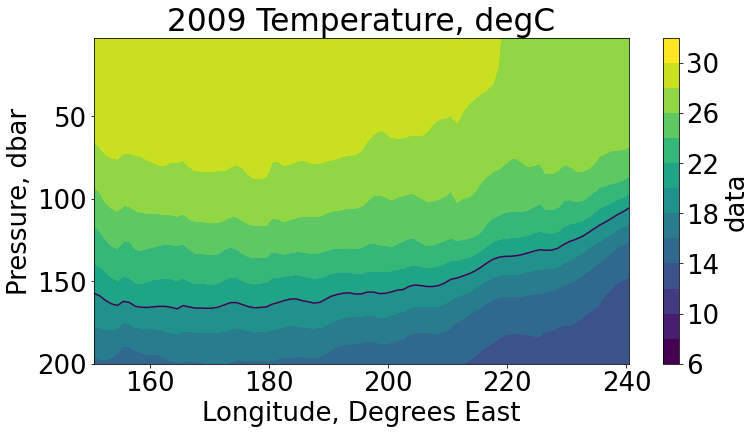

[[150.5,-7], [150.5,7], [-119.5,7], [-119.5,-7], [150.5,-7]]
{'startDate': '2010-12-01T00:00:00Z', 'endDate': '2010-12-31T00:00:00Z', 'polygon': '[[150.5,-7], [150.5,7], [-119.5,7], [-119.5,-7], [150.5,-7]]', 'data': 'rg09_temperature', 'presRange': '0,250', 'compression': 'array'}


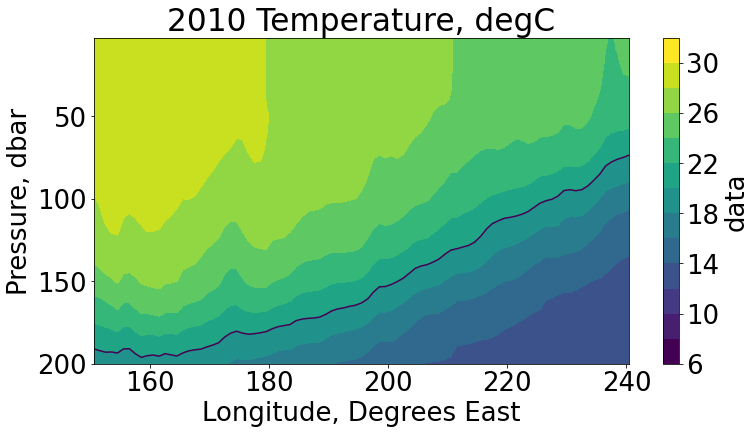

[[150.5,-7], [150.5,7], [-119.5,7], [-119.5,-7], [150.5,-7]]
{'startDate': '2015-12-01T00:00:00Z', 'endDate': '2015-12-31T00:00:00Z', 'polygon': '[[150.5,-7], [150.5,7], [-119.5,7], [-119.5,-7], [150.5,-7]]', 'data': 'rg09_temperature', 'presRange': '0,250', 'compression': 'array'}


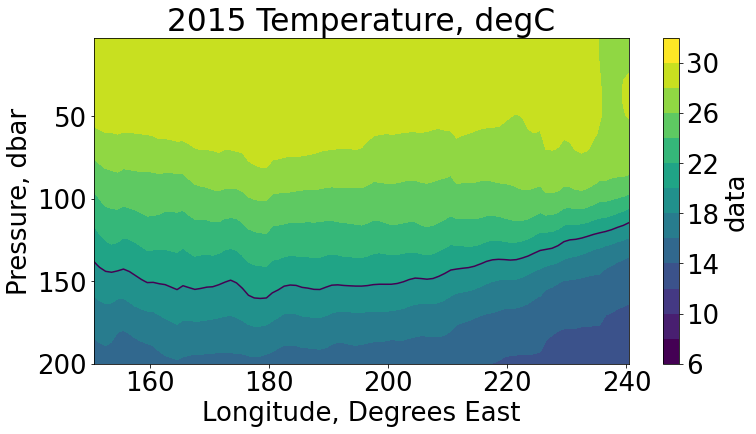

In [12]:
run_activity_sections(activity=activity,str_year='year_enso')

## Question #7: For each of the years, how does the temperature section compare with 2013? Which years do you think may correspond to the same ENSO phase? (i.e. which years would you group together as they look similar to one another and different from 2013?) Are the years in each group the same as in your answer for question #4?

NOTE: the colorbar is the same in each panel, hence each color corresponds to the same temperature in each panel.

# >>>>>>> ***Today's in-class activity ends here. If curious, please explore the remaining part of the notebook at home.*** <<<<<<<

## The remaining part of the notebook shows how to plot the ONI index and compare it with a temperature timeseries (in the same region) from the Roemmich and Gilson product. Please note the code may take several minutes to complete for the last plot in the notebook. If you run the code, you should see the plots we discussed in class.

## Oceanic Niño Index (ONI)

In the following, we will consider the ONI index (https://www.climate.gov/news-features/understanding-climate/climate-variability-oceanic-ni%C3%B1o-index). There are several indices used to monitor the tropical Pacific, all of which are based on SST anomalies averaged across a given region.  Usually the anomalies are computed relative to a base period of 30 years.  The Niño 3.4 index and the Oceanic Niño Index (ONI) are the most commonly used indices to define El Niño and La Niña events.  The ONI uses the same region as the Niño 3.4 index (5N-5S, 170W-120W).  The ONI uses a 3-month running mean, and to be classified as a full-fledged El Niño or La Niña, the anomalies must exceed +0.5C or -0.5C for at least five consecutive months.  This is the operational definition used by NOAA.

We will compare the ONI index to a tempearature time series from the Roemmich and Gilson (2009) product.

In [15]:
# load ONI
url = "https://www.cpc.ncep.noaa.gov/data/indices/oni.ascii.txt"
file = urllib.request.urlopen(url)

ONI = []
ONI_year = []
ONI_mmm  = []

for line in file:
    decoded_line = line.decode("utf-8")
    #print(decoded_line)
    if decoded_line.split(' ')[-1].replace('\n','') !='ANOM':
        ONI.append(float(decoded_line.split(' ')[-1].replace('\n','')))
        ONI_year.append(int(decoded_line.split(' ')[3]))
        ONI_mmm.append((decoded_line.split(' ')[2]))

URLError: <urlopen error [Errno 110] Connection timed out>

In [ ]:
# create datetime64 axis for ONI
ONI_datetime64 = []
for iyr in np.unique(ONI_year):
    msk = [x==iyr for x in ONI_year]
    for mm in np.arange(1,sum(msk)+1,1):
        ONI_datetime64.append(np.datetime64(f'{iyr:04d}'+'-'+f'{mm:02d}'+'-15'))

Let's plot the ONI during the period of the Roemmich and Gilson (2009) product.

In [ ]:
plot_line_pos_neg(data=np.array(ONI),data_time=np.array(ONI_datetime64), \
                  data_time_delta_num=12,data_ylabel='Temperature, degC',data_title='ONI',font_size='26')

plt.xlim(np.datetime64('2004-01-01'),np.datetime64('2021-12-31'))
#plt.xlim(np.datetime64('1990-01-01'),np.datetime64('2022-12-31'))
plt.show()

## Now let's make a plot for the same region from the Roemmich and Gilson (2009) product. 

The code below was run before and the plot included, as it takes a few minutes to get the data from Argovis. You can still run the code yourself: if you do so and wait, you should obtain the same plot.

In [13]:
latitude_south_index = -5
latitude_north_index = 5

longitude_west_index = -170
longitude_east_index = -120

levels_index    = '0,5' # '290,310' # '0,5'

data = query_grid_by_region_month_year( lattice_name = 'grid_1_1_0.5_0.5' ,\
                                        grid_name=activity['grid_name'],\
                                        region_str = create_boxstr_for_query(longitude_west=longitude_west_index,\
                                                                             longitude_east=longitude_east_index, \
                                                                             latitude_south=latitude_south_index,\
                                                                             latitude_north=latitude_north_index), \
                                        long_conversion_type='long20_380',\
                                        levels=levels_index,\
                                        month_start=1,year_start=2004,\
                                        month_end=12,year_end=2021,\
                                        API_KEY=API_KEY,API_PREFIX=API_PREFIX)

# compute anomalies
data_reg_ave = areaweighted_region_mean(dxr=data.mean(dim="pressure"))
data_reg_ave_detrend = data_reg_ave*0 + signal.detrend(data_reg_ave["data"])
climatology = data_reg_ave_detrend.groupby("time.month").mean("time")
data_reg_ave_anom   = data_reg_ave_detrend.groupby("time.month") - climatology

[[-170,-5], [-170,5], [-120,5], [-120,-5], [-170,-5]]
{'startDate': '2004-01-01T00:00:00Z', 'endDate': '2021-12-31T00:00:00Z', 'polygon': '[[-170,-5], [-170,5], [-120,5], [-120,-5], [-170,-5]]', 'data': 'rg09_temperature', 'presRange': '0,5', 'compression': 'array'}


Exception: 413: The temporospatial extent of your request is very large and likely to crash our API. Please request a smaller region or shorter timespan, or both.

Plot timeseries for the horizontal average, highlighting positive versus negative values. This figure should look like the one just above (as that one was obtained running the same code).

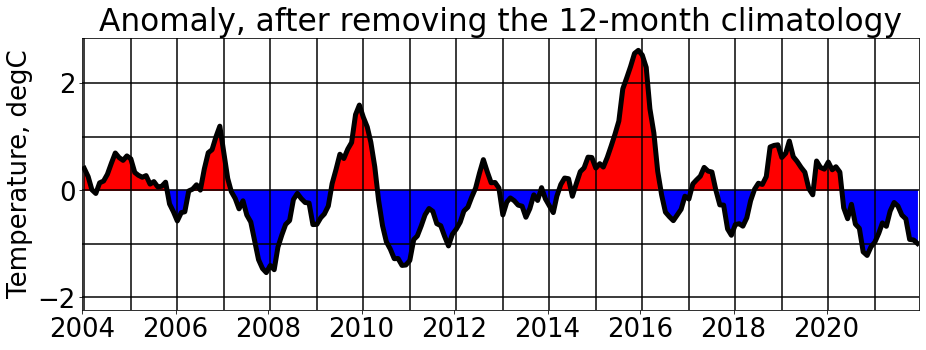

In [17]:
plot_line_pos_neg(data=data_reg_ave_anom["data"],data_time=data_reg_ave_anom["time"].to_numpy(), \
                  data_time_delta_num=12,data_ylabel='Temperature, degC', \
                  data_title='Anomaly, after removing the 12-month climatology',font_size='26')

plt.xlim(np.datetime64('2004-01-01'),np.datetime64('2021-12-31'))
plt.show()

In [ ]:
# # plots
# climatology["data"].plot(size=10,aspect=3)
# data_reg_ave["data"].plot(size=10,aspect=3)
# data_reg_ave_detrend["data"].plot(size=10,aspect=3)
